# CPU scaling 

This is example of data processing of CPU scaling data

## Data preparation

In [1]:
from dotenv import load_dotenv
import pandas as pd
import os

To seamless command run **ssh-agent** must be enabled!

Check and create `.env` file or set environment variables. 

In [2]:
load_dotenv()
SSH_CONNECT_STRING = os.getenv("SSH_CONNECT_STRING")
METRIC = "cpu"  

if not SSH_CONNECT_STRING:
    raise  ValueError('empty setting SSH_CONNECT_STRING')

Most of parsing code in this module. This pure python module is not published, but can be used directly.

In [3]:
import pandas_atop_reader

This code creates local `.atop_cache` directory with copy of remote atop files.

In [4]:
pandas_atop_reader.sync_remote_to_local(SSH_CONNECT_STRING,'.atop_cache');

receiving incremental file list
./
atop_20250516
atop_20250517
atop_20250518
dummy_after
dummy_before

sent 16,094 bytes  received 21,402,945 bytes  3,894,370.73 bytes/sec
total size is 373,945,846  speedup is 17.46


In [5]:
df=pandas_atop_reader.process_files_batch(pandas_atop_reader.get_local_cache(),kind='cpufreq')

Lets examine data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4706 entries, 2025-04-28 21:10:01+00:00 to 2025-05-14 21:00:01+00:00
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cpu0    4706 non-null   int64
 1   cpu1    4706 non-null   int64
 2   cpu2    4706 non-null   int64
 3   cpu3    4706 non-null   int64
 4   cpu4    4706 non-null   int64
 5   cpu5    4706 non-null   int64
 6   cpu6    4706 non-null   int64
 7   cpu7    4706 non-null   int64
 8   cpu8    4706 non-null   int64
 9   cpu9    4706 non-null   int64
 10  cpu10   4706 non-null   int64
 11  cpu11   4706 non-null   int64
 12  cpu12   4706 non-null   int64
 13  cpu13   4706 non-null   int64
 14  cpu14   4706 non-null   int64
 15  cpu15   4706 non-null   int64
dtypes: int64(16)
memory usage: 625.0 KB


In [7]:
df.head(3)

,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7,cpu8,cpu9,cpu10,cpu11,cpu12,cpu13,cpu14,cpu15
timestamp,,,,,,,,,,,,,,,,
2025-04-28 21:10:01+00:00,1600,1600,1600,1600,1834,2400,2198,2054,1600,1600,1599,1600,1658,2400,1689,2047
2025-04-28 21:20:01+00:00,1600,1600,1600,1600,2400,2400,2400,2400,1600,1600,1599,1600,2400,2400,2400,2400
2025-04-28 21:30:01+00:00,1600,1600,1599,1599,1795,1787,1681,1731,1600,1600,1600,1600,1914,2248,1686,2030


## Analisys

Prepare the data for a more beautiful plot

In [8]:
df['mean_cpu'] = df.mean(axis=1)
hourly_mean = df['mean_cpu'].resample('1H').mean()

Lets show some **matplotlib** magic

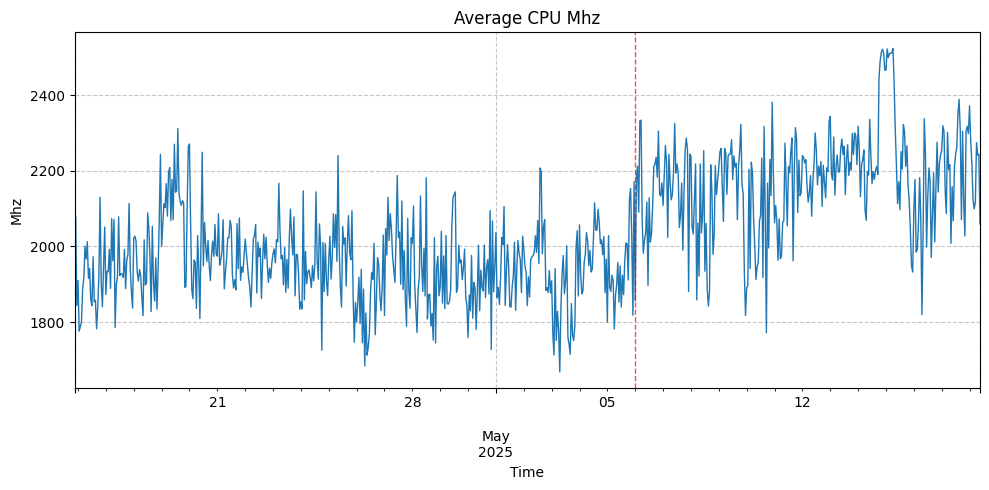

In [9]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(10, 5))
hourly_mean.plot(linewidth=1)
plt.title('Average CPU Mhz')
plt.xlabel('Time')
plt.ylabel('Mhz')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

change_date = datetime(2025, 5, 6, 0, 1, 0)
plt.axvline(x=change_date, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.show()

This report shows that after making changes to the CPU governor,  CPU frequency became more responsive and average scale higher. 